In [227]:
import pandas as pd

In [228]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [229]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [231]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [232]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [233]:
train.shape

(891, 12)

In [234]:
test.shape

(418, 11)

In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [236]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [237]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [238]:
from matplotlib import pyplot as plt
import seaborn as sb

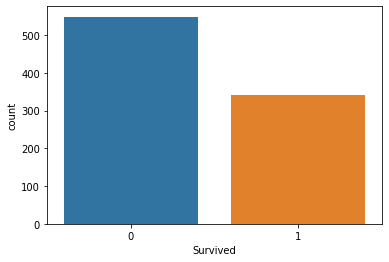

In [239]:
sb.countplot(x='Survived', data=train)

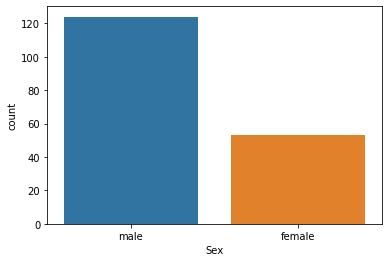

In [240]:
sb.countplot(x='Sex', data=train[train['Age'].isnull()])

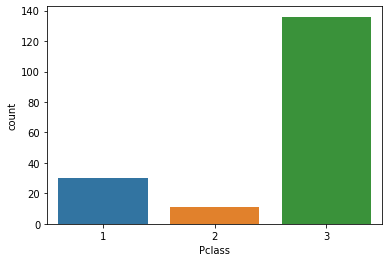

In [241]:
sb.countplot(x='Pclass', data=train[train['Age'].isnull()])

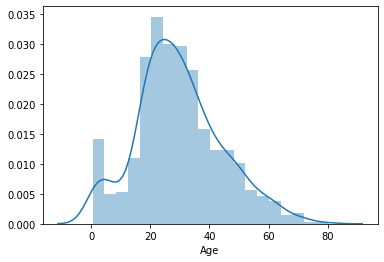

In [242]:
sb.distplot(train[train['Age'].notnull()]['Age'])

In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [247]:
index_NaN_age = list(train["Age"][train["Age"].isnull()].index)
age_med = train["Age"].median()
for i in index_NaN_age :
    age_pred = train["Age"][((train['SibSp'] == train.iloc[i]["SibSp"]) & (train['Parch'] == train.iloc[i]["Parch"]) & (train['Pclass'] == train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        train['Age'].iloc[i] = age_pred
    else :
        train['Age'].iloc[i] = age_med

        
index_NaN_age = list(test["Age"][test["Age"].isnull()].index)
age_med = test["Age"].median()
for i in index_NaN_age :
    age_pred = test["Age"][((test['SibSp'] == test.iloc[i]["SibSp"]) & (test['Parch'] == test.iloc[i]["Parch"]) & (test['Pclass'] == test.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        test['Age'].iloc[i] = age_pred
    else :
        test['Age'].iloc[i] = age_med

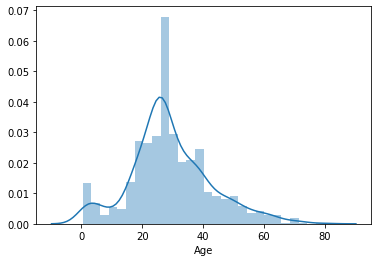

In [248]:
sb.distplot(train['Age'])

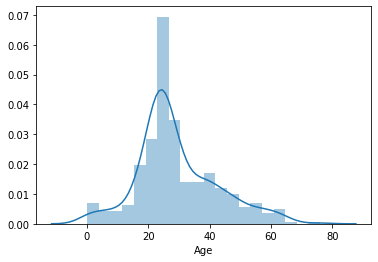

In [249]:
sb.distplot(test['Age'])

In [250]:
train.Cabin.notnull().sum(), train.Cabin.isnull().sum()

(204, 687)

In [251]:
test.Cabin.notnull().sum(), test.Cabin.isnull().sum()

(91, 327)

In [252]:
import numpy as np
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [253]:
outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.drop(outliers_to_drop, axis = 0, inplace=True)
train.shape

(875, 12)

In [258]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

In [259]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,SmallF,MedF,LargeF,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,0,Mr


In [405]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
train['Single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallF'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['MedF'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeF'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [406]:
test['FamilySize'] = test ['SibSp'] + test['Parch'] + 1
test['Single'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test['SmallF'] = test['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
test['MedF'] = test['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeF'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [407]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'] ])

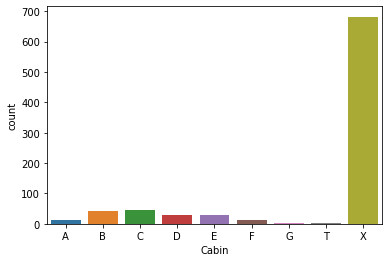

In [408]:
sb.countplot(train["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


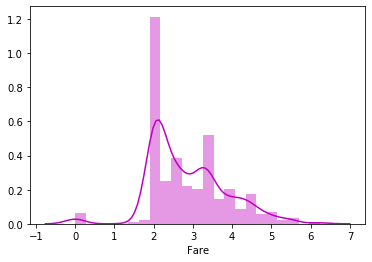

In [409]:
sb.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))

In [410]:
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

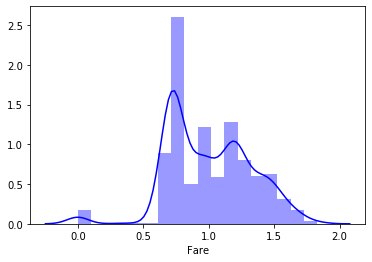

In [411]:
sb.distplot(train["Fare"], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))

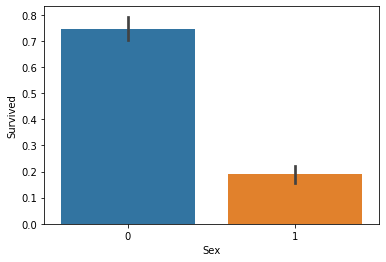

In [412]:
sb.barplot(x="Sex",y="Survived",data=train)

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


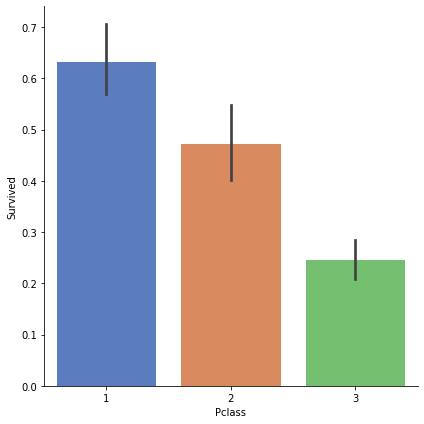

In [413]:
sb.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")

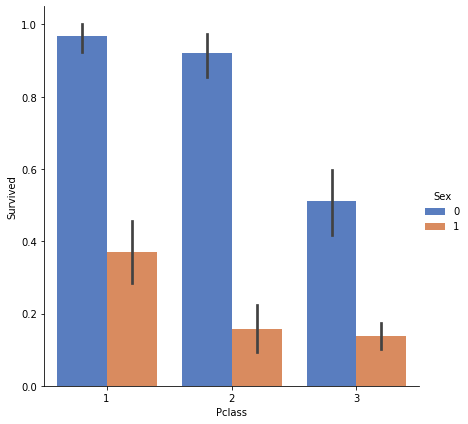

In [414]:
sb.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")

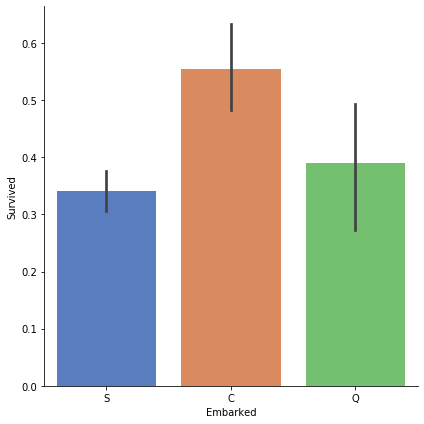

In [415]:
sb.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")

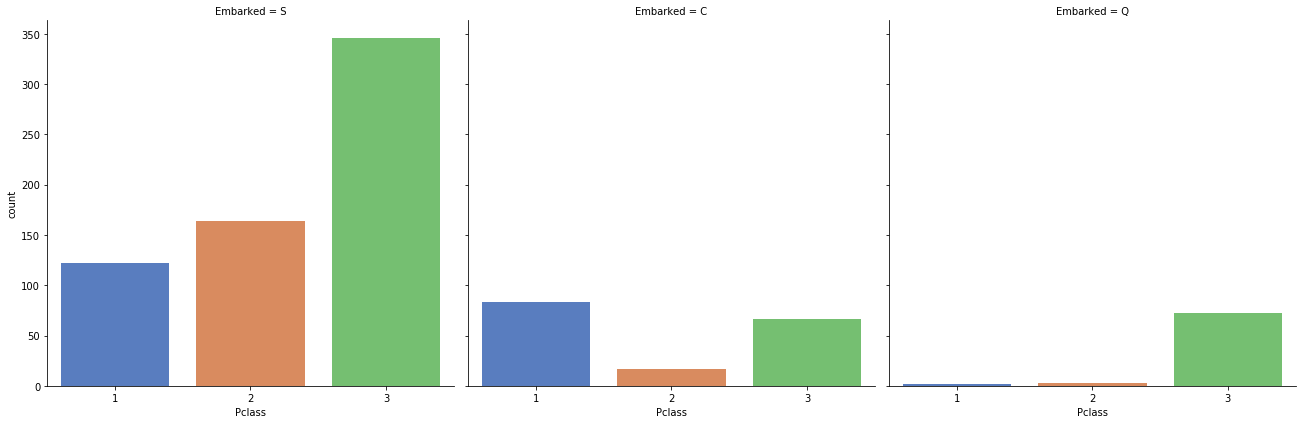

In [416]:
sb.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")

In [417]:
train['Title'].value_counts()

Mr              510
Miss            177
Mrs             124
Master           38
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Sir               1
Don               1
Lady              1
the Countess      1
Ms                1
Jonkheer          1
Name: Title, dtype: int64

In [418]:
train_title_names = (train['Title'].value_counts() < 10)
test_title_names = (test['Title'].value_counts() < 10)

In [419]:
train_title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Col              True
Major            True
Mme              True
Sir              True
Don              True
Lady             True
the Countess     True
Ms               True
Jonkheer         True
Name: Title, dtype: bool

In [420]:
train['Title'] = train['Title'].apply(lambda x: 'Misc' if train_title_names[x] == True else x)
test['Title'] = test['Title'].apply(lambda x: 'Misc' if test_title_names[x] == True else x)

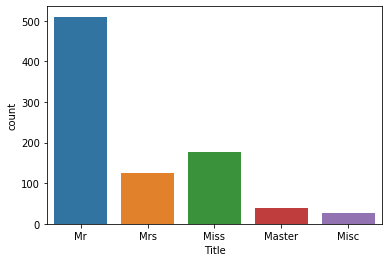

In [421]:
sb.countplot(x='Title', data=train)

In [422]:
from sklearn.preprocessing import LabelEncoder

In [423]:
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])

In [424]:
from sklearn.preprocessing import OneHotEncoder

In [425]:
onehot_encoder = OneHotEncoder()

In [426]:
def onehot(df):
    print(df.head())
    df = pd.get_dummies(df)
    return df

In [427]:
train_onehot = onehot(train[['Pclass', 'Cabin', 'Embarked', 'Title']])

   Pclass Cabin Embarked Title
0       3     X        S    Mr
1       1     C        C   Mrs
2       3     X        S  Miss
3       1     C        S   Mrs
4       3     X        S    Mr


In [428]:
test_onehot = onehot(test[['Pclass', 'Cabin', 'Embarked', 'Title']])

   Pclass Cabin Embarked Title
0       3     X        Q    Mr
1       3     X        S   Mrs
2       2     X        Q    Mr
3       3     X        S    Mr
4       3     X        S   Mrs


In [429]:
train_onehot.drop(['Pclass'], axis=1, inplace=True)

In [430]:
test_onehot.drop(['Pclass'], axis=1, inplace=True)

In [431]:
train_combined = train.join(train_onehot)
test_combined = test.join(test_onehot)

In [432]:
train_combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Single',
       'SmallF', 'MedF', 'LargeF', 'Title', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [433]:
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Name']
train_cleaned = train_combined.drop(columns_to_drop, axis=1)

In [434]:
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Name']
test_cleaned = test_combined.drop(columns_to_drop, axis=1)

In [435]:
train_cleaned.columns, train_cleaned.shape

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'FamilySize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A',
        'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
        'Cabin_T', 'Cabin_X', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
        'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
       dtype='object'), (875, 29))

In [436]:
test_cleaned.columns, test_cleaned.shape

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
        'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B', 'Cabin_C',
        'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss',
        'Title_Mr', 'Title_Mrs'],
       dtype='object'), (418, 27))

In [437]:
from sklearn.model_selection import train_test_split

In [438]:
trainX = train_cleaned.drop(['Survived', 'Cabin_T'], axis=1).values
trainY = train_cleaned['Survived'].values

In [439]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, random_state=42)

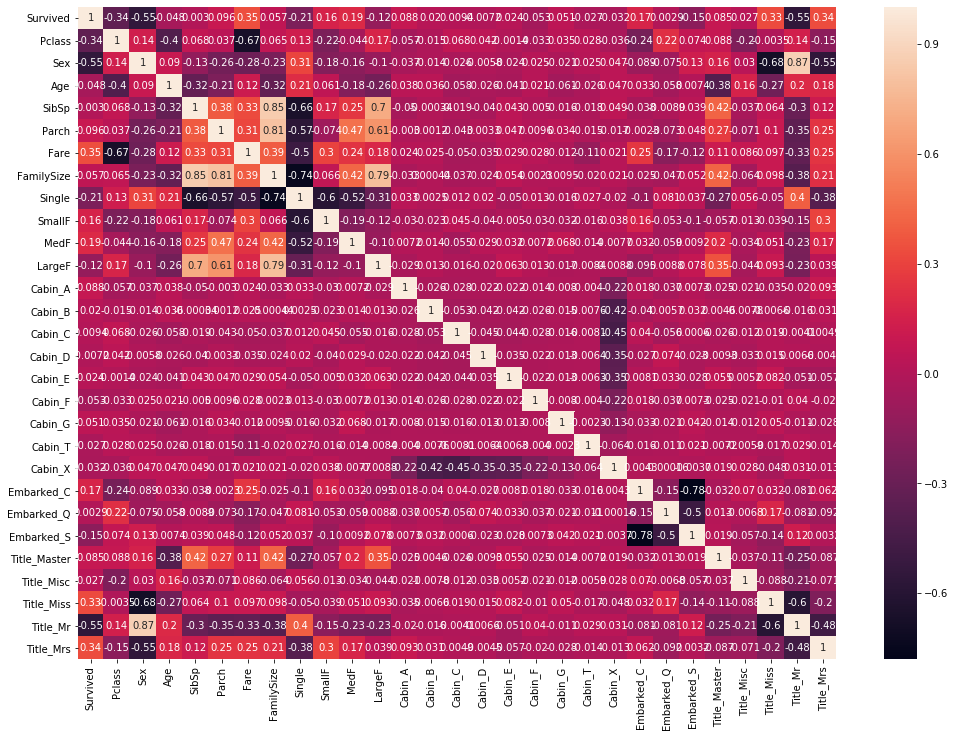

In [440]:
plt.figure(figsize=(17,12))
sb.heatmap(train_cleaned.corr(), annot=True)

In [441]:
train_cleaned.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Single,SmallF,...,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
Survived,1.000000,-0.335677,-0.547680,-0.047592,0.002955,0.096365,0.345592,0.056516,-0.211371,0.160257,...,-0.026771,-0.032101,0.168116,0.002852,-0.148976,0.084858,0.027473,0.332249,-0.554509,0.338330
Pclass,-0.335677,1.000000,0.136898,-0.400326,0.068298,0.037388,-0.665726,0.064562,0.127207,-0.223075,...,0.027840,-0.036187,-0.244151,0.221656,0.073529,0.087585,-0.204515,-0.003540,0.143886,-0.150970
Sex,-0.547680,0.136898,1.000000,0.089502,-0.132271,-0.258528,-0.278843,-0.230568,0.309743,-0.183735,...,0.024930,0.046539,-0.088913,-0.075143,0.125367,0.157041,0.030328,-0.683243,0.871209,-0.551324
Age,-0.047592,-0.400326,0.089502,1.000000,-0.317942,-0.213863,0.116198,-0.323125,0.207962,0.060773,...,-0.026084,0.046529,0.033360,-0.057881,0.007408,-0.384730,0.159949,-0.268316,0.195216,0.180016
SibSp,0.002955,0.068298,-0.132271,-0.317942,1.000000,0.382498,0.330658,0.851784,-0.655078,0.170706,...,-0.017580,0.049149,-0.037785,-0.008946,0.038736,0.422359,-0.036980,0.064176,-0.295742,0.115384
Parch,0.096365,0.037388,-0.258528,-0.213863,0.382498,1.000000,0.314702,0.809860,-0.570922,-0.073958,...,-0.015321,-0.017123,-0.002324,-0.073434,0.048484,0.270275,-0.070632,0.100327,-0.345151,0.248865
Fare,0.345592,-0.665726,-0.278843,0.116198,0.330658,0.314702,1.000000,0.388375,-0.496712,0.297821,...,-0.106430,0.020702,0.254587,-0.166898,-0.117301,0.110731,0.086316,0.096961,-0.330157,0.248370
FamilySize,0.056516,0.064562,-0.230568,-0.323125,0.851784,0.809860,0.388375,1.000000,-0.739630,0.066447,...,-0.019849,0.021496,-0.025308,-0.047318,0.052085,0.421406,-0.063528,0.097632,-0.383472,0.214367
Single,-0.211371,0.127207,0.309743,0.207962,-0.655078,-0.570922,-0.496712,-0.739630,1.000000,-0.596260,...,0.026836,-0.020114,-0.101034,0.080733,0.037381,-0.268570,0.055895,-0.050411,0.399889,-0.377571
SmallF,0.160257,-0.223075,-0.183735,0.060773,0.170706,-0.073958,0.297821,0.066447,-0.596260,1.000000,...,-0.016001,0.037731,0.155685,-0.053017,-0.102755,-0.057277,-0.013134,-0.039492,-0.151442,0.299471


In [442]:
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier

In [443]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [444]:
from sklearn.model_selection import cross_val_score

In [445]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 890
Data columns (total 29 columns):
Survived        875 non-null int64
Pclass          875 non-null int64
Sex             875 non-null int64
Age             875 non-null float64
SibSp           875 non-null int64
Parch           875 non-null int64
Fare            875 non-null float64
FamilySize      875 non-null int64
Single          875 non-null int64
SmallF          875 non-null int64
MedF            875 non-null int64
LargeF          875 non-null int64
Cabin_A         875 non-null uint8
Cabin_B         875 non-null uint8
Cabin_C         875 non-null uint8
Cabin_D         875 non-null uint8
Cabin_E         875 non-null uint8
Cabin_F         875 non-null uint8
Cabin_G         875 non-null uint8
Cabin_T         875 non-null uint8
Cabin_X         875 non-null uint8
Embarked_C      875 non-null uint8
Embarked_Q      875 non-null uint8
Embarked_S      875 non-null uint8
Title_Master    875 non-null uint8
Title_Misc      

In [446]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

In [447]:
cv_results = []
for classifier in MLA :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold))

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kelvin

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_mod

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs faile

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs faile

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs faile

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs faile

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kelvin/anac

In [448]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_means

[0.8094638694638695,
 0.8185780885780884,
 0.8049184149184148,
 0.8276456876456877,
 0.82,
 0.7926340326340325,
 0.8261072261072261,
 0.7483916083916083,
 0.8322144522144523,
 0.7850582750582751,
 0.605920745920746,
 0.7986247086247086,
 0.7926806526806527,
 0.7713053613053613,
 0.8077622377622378,
 0.8107925407925407,
 0.7942424242424242,
 0.7988578088578088,
 0.7988811188811189,
 0.8261305361305362,
 0.6676456876456877,
 0.8185314685314685]

In [449]:
DTC = tree.DecisionTreeClassifier()

adaDTC = ensemble.AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 127 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.4s finished


In [450]:
gsadaDTC.best_score_

0.823170731707317

In [451]:
ExtC = ensemble.ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   40.4s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   49.5s finished


0.8475609756097561

In [452]:
RFC = ensemble.RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   55.8s finished


0.8414634146341463

In [453]:
GBC = ensemble.GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   24.6s finished
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8353658536585366

In [454]:
SVMC = svm.SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   15.8s finished
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8262195121951219

In [455]:
names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

In [456]:
votingC = ensemble.VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [457]:
test_cleaned[test_cleaned['FamilySize'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Single,SmallF,MedF,...,Cabin_G,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs


In [460]:
pred = votingC.predict(test_cleaned)

In [461]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [462]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred
submission.to_csv('my_submission.csv', index=False)